# What's in an Avocado Toast: A Supply Chain Analysis

You're in London, making an avocado toast, a quick-to-make dish that has soared in popularity on breakfast menus since the 2010s. A simple smashed avocado toast can be made with five ingredients: one ripe avocado, half a lemon, a big pinch of salt flakes, two slices of sourdough bread and a good drizzle of extra virgin olive oil. It's no small feat that most of these ingredients are readily available in grocery stores. 

In this project, you'll conduct a supply chain analysis of three of these ingredients used in an avocado toast, utilizing the Open Food Facts database. This database contains extensive, openly-sourced information on various foods, including their origins. Through this analysis, you will gain an in-depth understanding of the complex supply chain involved in producing a single dish.

Three pairs of files are provided in the data folder:
- A CSV file for each ingredient, such as `avocado.csv`, with data about each food item and countries of origin
- A TXT file for each ingredient, such as `relevant_avocado_categories`, containing only the category tags of interest for that food.

Here are some other key points about these files:
- Some of the rows of data in each of the three CSV files do not contain relevant data for your investigation. In each dataset, you will need to filter out rows with irrelevant data, based on values in the `categories_tags` column. Examples of categories are, fruits, vegetables, and fruit-based oils. Filter the DataFrame to include only rows where `categories_tags` contains one of the tags in the relevant categories for that ingredient.
- Each row of data usually has multiple categories tags in the `categories_tags` column.
- There is a column in each CSV file called `origins_tags` with strings for country of origin of that item.

After completing this project, you'll be armed with a list of ingredients and their countries of origin, and be well-positioned to launch into other analyses that explore how long, on average, these ingredients spend at sea.

![](avocado_wallpaper.jpeg)

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
# Begin coding here ...

def load(file_path):
    return pd.read_csv(file_path, sep='\t', usecols=['code', 'lc', 'product_name_en', 'quantity', 'serving_size', 'packaging_tags', 'brands', 'brands_tags', 'categories_tags', 'labels_tags', 'countries', 'countries_tags', 'origins','origins_tags'])

def transform(df, ingredient):
    df = df.loc[(df['countries'] == 'United Kingdom') & (df['categories_tags'].str.contains(ingredient, na=False))]
    return df['origins_tags']\
                .str.split(',')\
                .explode()\
                .str.replace(r'^[a-z]{2}:', '',regex=True)\
                .str.replace("-", ' ')\
                .str.replace(r'\d+', '', regex=True)\
                .value_counts().sort_values()


In [161]:
avocado = load('data/avocado.csv')
avocado.loc[avocado['countries'] == 'United Kingdom']['origins_tags'].value_counts()

en:peru             2
en:spain,en:peru    1
en:chile,en:peru    1
en:israel           1
en:south-africa     1
Name: origins_tags, dtype: int64

most common country of avocado origin is peru


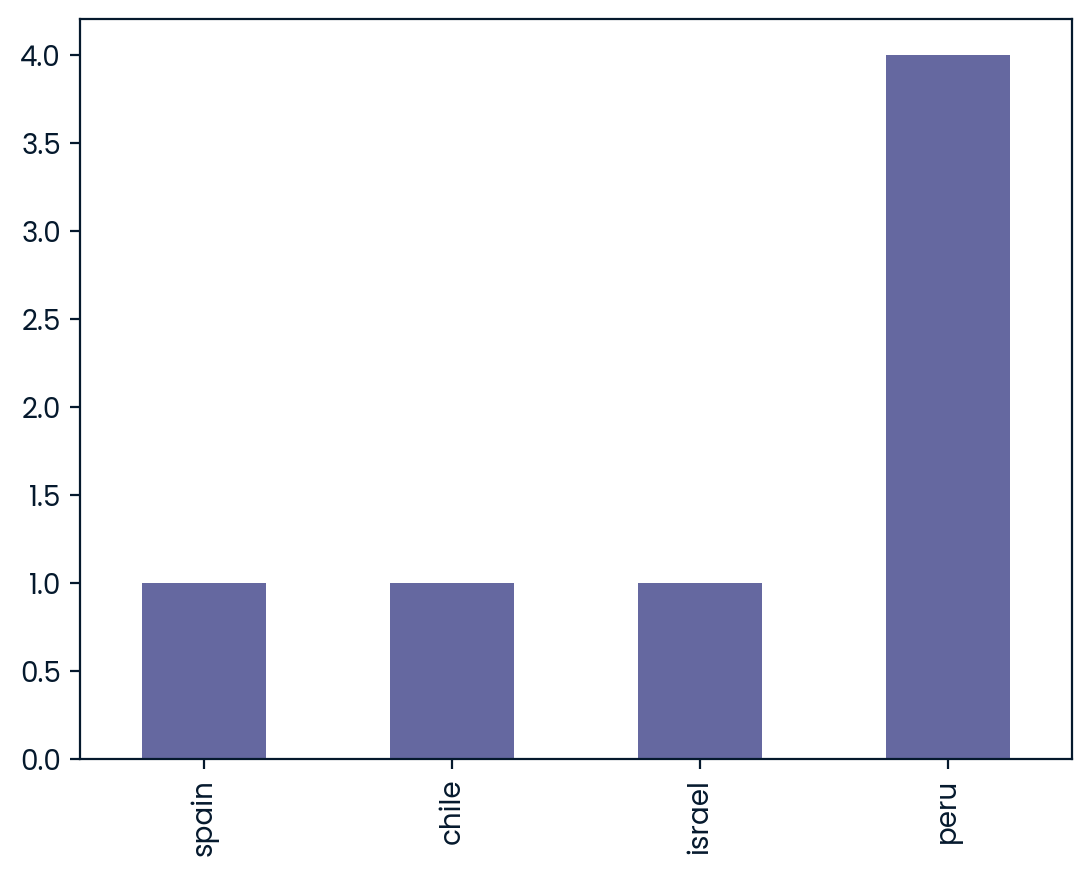

In [162]:
avocado = load('data/avocado.csv')
transformed_avocado = transform(avocado, 'fruits')
transformed_avocado.plot(kind='bar')

top_avocado_origin = transformed_avocado.idxmax()
print(f"most common country of avocado origin is {top_avocado_origin}")

most common country of olive oil origin is greece


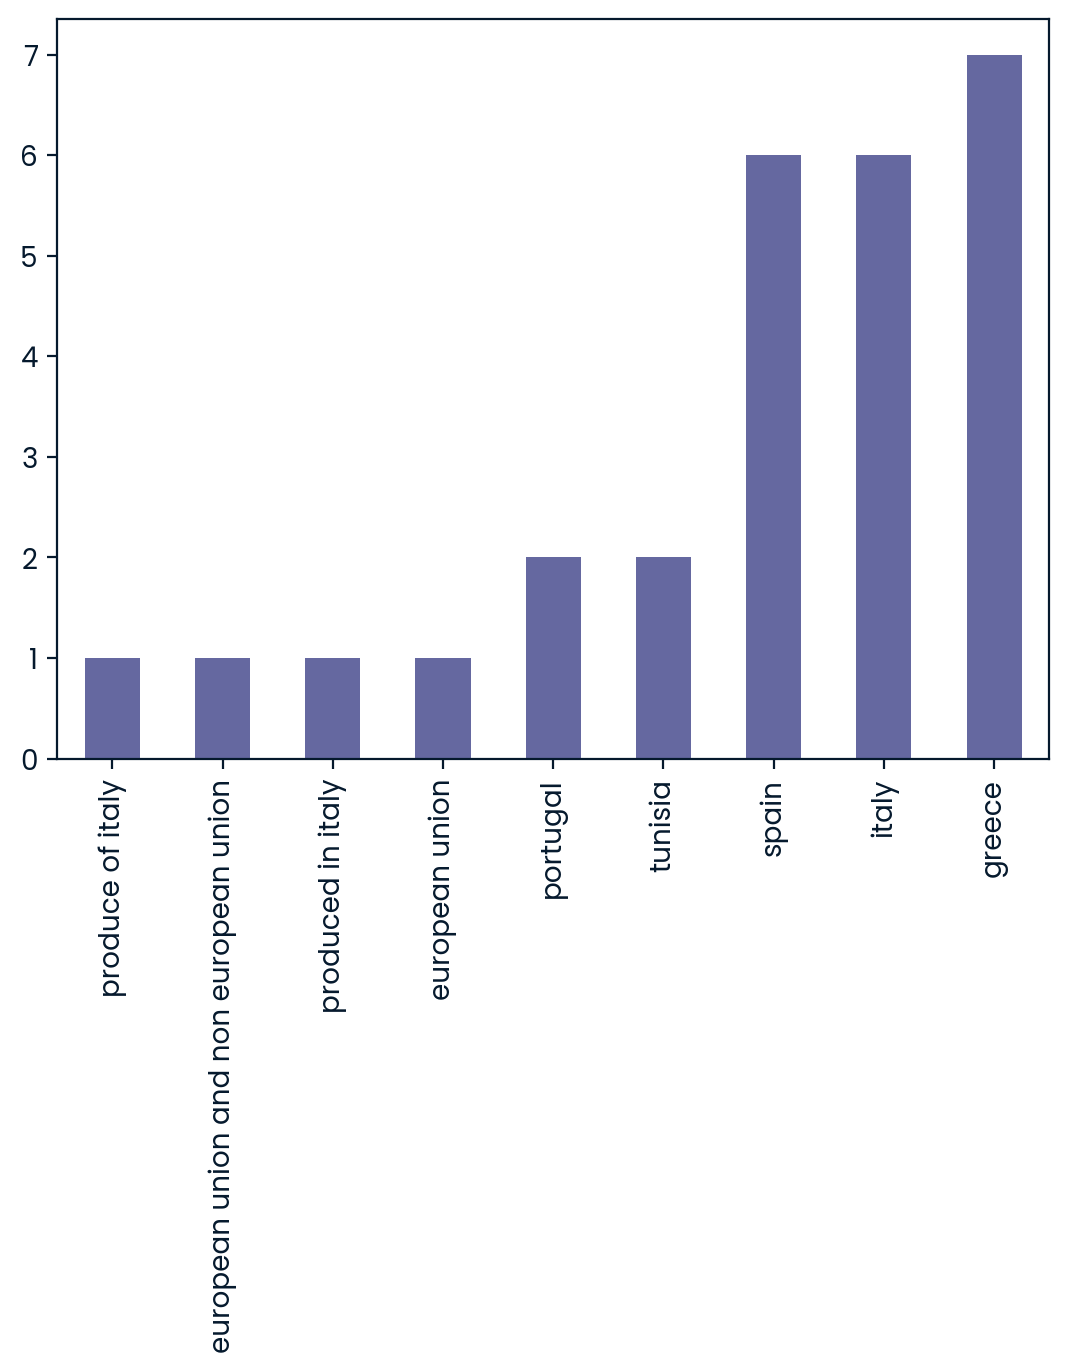

In [163]:
olive_oil = load('data/olive_oil.csv')
transformed_olive_oil = transform(olive_oil, 'oils')
transformed_olive_oil[-10:].plot(kind='bar')

top_olive_oil_origin = transformed_olive_oil.idxmax()
print(f"most common country of olive oil origin is {top_olive_oil_origin}")

most common country of sourdough origin is united kingdom


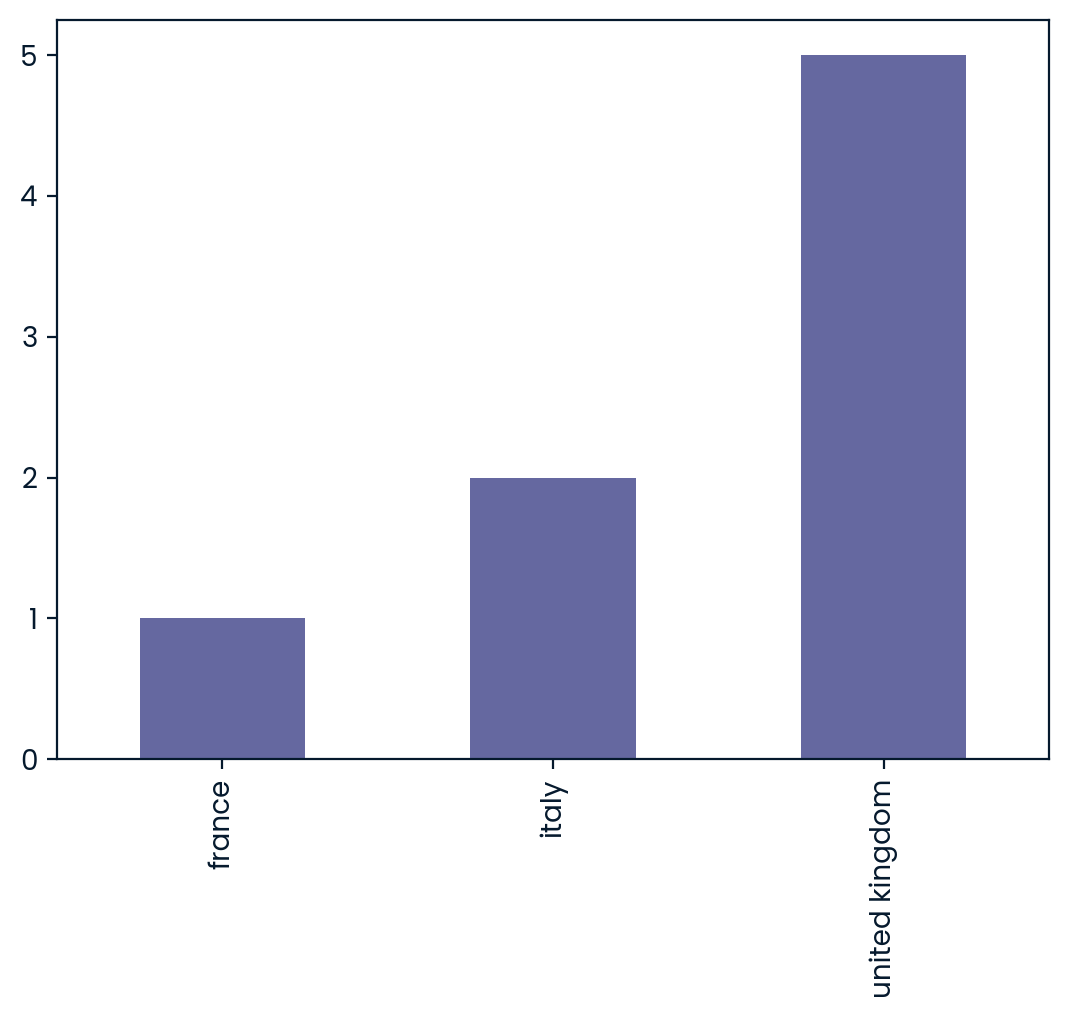

In [164]:
sourdough = load('data/sourdough.csv')
transformed_sourdough = transform(sourdough, '')
transformed_sourdough.plot(kind='bar')

top_sourdough_origin = transformed_sourdough.idxmax()
print(f"most common country of sourdough origin is {top_sourdough_origin}")